# Recognising Handwritten Digits on MNIST Dataset Using KNN-Algorithm

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv')
data = df.values

In [6]:
# It returns the first five rows by default of the train.csv dataset
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [7]:
print(df.shape)

(42000, 785)


In [8]:
# Labels in the Y section
# Pixels in the X section
x = data[: , 1:]
y = data[: , 0]

In [9]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [11]:
# Split the dataset in training and testing 

In [12]:
split = int(0.8 * x.shape[0])

In [13]:
split

33600

In [14]:
# Distribute the data in 80% to 20% (training data, testing data) respectively. 

In [15]:
x_train = x[:split, :]
y_train = y[:split]

In [16]:
x_test = x[split: , :]
y_test = y[split:]

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [18]:
def drawImgSample(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

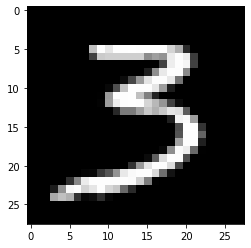

In [19]:
drawImgSample(x_train[25])

In [20]:
print(y_train[25])

3


In [21]:
# Apply KNN Alogorithm

In [22]:
# function to calculate distance between N-dimensional point in space
def distance(v1, v2):
    return np.sqrt(sum((v1-v2)**2))

In [23]:
def KNN(x,y,query,k = 5):
    distance_list = []
    for i in range(x.shape[0]):
        d = distance(x[i], query)
        distance_list.append((d,y[i]))
        
    vals = sorted(distance_list)
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:, 1], return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [24]:
# Make Prediction

pred = KNN(x_train,y_train,x_test[31])
print(int(pred))

8


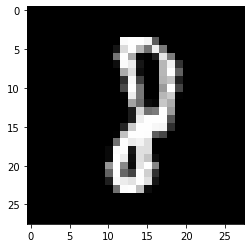

8


In [25]:
drawImgSample(x_test[31])
print(y_test[31])

In [ ]:
# Accuracy of the model
valid = 0
Total = 0
for i in range(8400):
    pred = KNN(x_train,y_train,x_test[i])
    Total += 1
    if(int(pred) == y_test[i]):
        valid += 1
        
print(valid, Total)